# 神经网络基础

本文介绍神经网络的基础概念以及如何用神经网络进行计算

In [3]:
import os
import os.path
import urllib.request
import numpy as np
import pickle, gzip, json
import matplotlib.pylab as plt

### 获取数据
* 手写字体数据（mnist.pkl.gz）
* 训练好的参数（sample_weight.pkl）

In [4]:


url_base = 'http://dikers-html.s3-website.cn-northwest-1.amazonaws.com.cn/data/'
# 数据保存的路径
dataset_dir = './'


print('数据下载路径: ',url_base)
print('数据保存路径: ', dataset_dir)

def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        print("file exist: ", file_name)
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
_download('mnist.pkl.gz')
_download('sample_weight.pkl')
    

数据下载路径:  http://dikers-html.s3-website.cn-northwest-1.amazonaws.com.cn/data/
数据保存路径:  ./
file exist:  mnist.pkl.gz
file exist:  sample_weight.pkl


# 感知器
-----------------------------------



### 与门



|  $x_1$    | $x_2$   |  y      |
|  -------  | ------  | ------  |
|   0       |  0      |    0    |
|   1       |  0      |    0    |
|   0       |  1      |    0    |
|   1       |  1      |    1    |


In [5]:
def ADD(x1, x2):
    w1, w2, b = 0.5, 0.5, 0.7
    tmp = x1 * w1 + x2 * w2
    if tmp > b:
        return 1
    else:
        return 0
print('0, 1 -> ', ADD(0,1))
print('0, 0 -> ', ADD(0,0))
print('1, 0 -> ', ADD(1,0))
print('1, 1 -> ', ADD(1,1))    

0, 1 ->  0
0, 0 ->  0
1, 0 ->  0
1, 1 ->  1


In [6]:

def ADD(x1, x2):
    x= np.array([x1, x2])
    w= np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(x * w) + b
    if tmp > 0:
        return 1
    else:
        return 0

### 或门



|  $x_1$    | $x_2$   |  y      |
|  -------  | ------  | ------  |
|   0       |  0      |    0    |
|   1       |  0      |    1    |
|   0       |  1      |    1    |
|   1       |  1      |    1    |

In [7]:
def OR(x1, x2):
    x= np.array([x1, x2])
    w= np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(x * w) + b
    if tmp > 0:
        return 1
    else:
        return 0
print('0, 1 -> ',OR(0,1))
print('0, 0 -> ',OR(0,0))
print('1, 0 -> ',OR(1,0))
print('1, 1 -> ',OR(1,1))

0, 1 ->  1
0, 0 ->  0
1, 0 ->  1
1, 1 ->  1


### 与非门



|  $x_1$    | $x_2$   |  y      |
|  -------  | ------  | ------  |
|   0       |  0      |    1    |
|   1       |  0      |    1    |
|   0       |  1      |    1    |
|   1       |  1      |    0    |

In [8]:
def NAND(x1, x2):
    x= np.array([x1, x2])
    w= np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(x * w) + b
    if tmp < 0:
        return 1
    else:
        return 0
print('0, 1 -> ', NAND(0,1))
print('0, 0 -> ', NAND(0,0))
print('1, 0 -> ', NAND(1,0))
print('1, 1 -> ', NAND(1,1))

0, 1 ->  1
0, 0 ->  1
1, 0 ->  1
1, 1 ->  0


### 异或门



|  $x_1$    | $x_2$   |  y      |
|  -------  | ------  | ------  |
|   0       |  0      |    0    |
|   1       |  0      |    1    |
|   0       |  1      |    1    |
|   1       |  1      |    0    |

In [9]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    return ADD(s1, s2)
print('0, 1 -> ',XOR(0,1))
print('0, 0 -> ',XOR(0,0))
print('1, 0 -> ',XOR(1,0))
print('1, 1 -> ',XOR(1,1))

0, 1 ->  1
0, 0 ->  0
1, 0 ->  1
1, 1 ->  0


# 激活函数
-------------

$a= b + w_1 x_1 + w_2 x_2$

$y = h(a)$

![image](https://github.com/dikers/machine-learn/blob/master/deep-learning/image/002.png?raw=true)


### 阶跃函数


In [10]:
def step_function(x):
    return np.array(x>0, dtype=np.int)

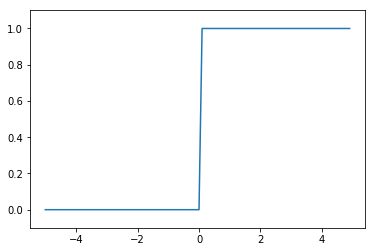

In [11]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### sigmod 函数
$ h(x) = \frac{1} {1+ exp(-x)} $

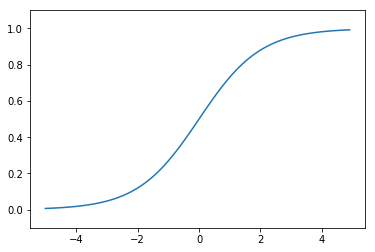

In [12]:
def sigmoid(x):
    return 1/ (1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [13]:
x = np.array([-1.0,1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

### 矩阵的乘法


In [14]:
A = np.array([[1,2,3], [4,5,6]])
print(A.shape)
B = np.array([[1,2],[3,4],[5,6]])
print(B.shape)

C = np.dot(A, B)
print(C.shape)
print(C)

(2, 3)
(3, 2)
(2, 2)
[[22 28]
 [49 64]]


# 多层网络信号传递的实现

![image](https://github.com/dikers/machine-learn/blob/master/deep-learning/image/003.png?raw=true)

In [15]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)


A1 = np.dot(X, W1)+B1
print('A1 shape: ', A1.shape)
print(A1)

Z1 = sigmoid(A1)
print('Z1: ', Z1)

(2,)
(2, 3)
(3,)
A1 shape:  (3,)
[0.3 0.7 1.1]
Z1:  [0.57444252 0.66818777 0.75026011]


#### 第二层网络计算

In [16]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.62624937 0.7710107 ]


#### 第三层网络计算

In [17]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) +B3
Y = identity_function(A3)

print(Y)

[0.31682708 0.69627909]


------------------------------
#  代码整体实现

In [18]:
class simple_network:
    def __init__(self):
        self.network = {}
        self.network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
        self.network['b1'] = np.array([0.1, 0.2, 0.3])
        self.network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
        self.network['b2'] = np.array([0.1, 0.2])
        self.network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
        self.network['b3'] = np.array([0.1, 0.2])
        
    def forward(self, x):
        W1, W2, W3 = self.network['W1'], self.network['W2'], self.network['W3']
        b1, b2, b3 = self.network['b1'], self.network['b2'], self.network['b3']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        y = identity_function(a3)
        
        return y
        
        

### 调用网络 进行预测

In [19]:

network = simple_network()
X = np.array([1.0, 0.5])
y = network.forward(X)
print(y)


[0.31682708 0.69627909]


------------------------------
# 手写字体识别



In [20]:
def get_data():
    %%time
    
    with gzip.open('mnist.pkl.gz', 'rb') as f:
        train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

        X_train = train_set[0]
        y_train = train_set[1]
        X_test = test_set[0]
        y_test = test_set[1]
        
    return X_train, y_train,  X_test, y_test


In [21]:
X_train, y_train,  X_test, y_test = get_data()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs


In [22]:
print(X_train.shape)

(50000, 784)


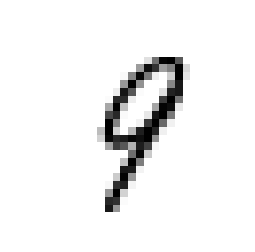

In [23]:
# 绘制一张图片
%matplotlib inline
import matplotlib
some_digit = X_train[22]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

### 激活函数

In [24]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def step_function(x):
    return np.array(x > 0, dtype=np.int)

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 溢出对策
    return np.exp(x) / np.sum(np.exp(x))

### 从模型中获取保存的参数，创建网络

In [25]:
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y



In [28]:


network = init_network()
accuracy_cnt = 0
for i in range(len(X_test)):
    y = predict(network, X_test[i])
    p= np.argmax(y) # 获取概率最高的元素的索引
    if p == y_test[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(X_test)))

Accuracy:0.9354


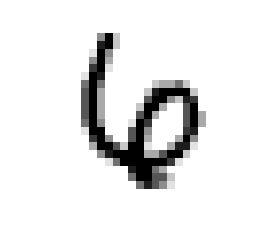

In [29]:
# 测试第22个元素
test_index = 22

%matplotlib inline
import matplotlib
some_digit = X_test[test_index]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [30]:
y = predict(network, X_test[test_index])
print (' 预测第',test_index, '个元素的值为 ' , np.argmax(y))

 预测第 22 个元素的值为  6
